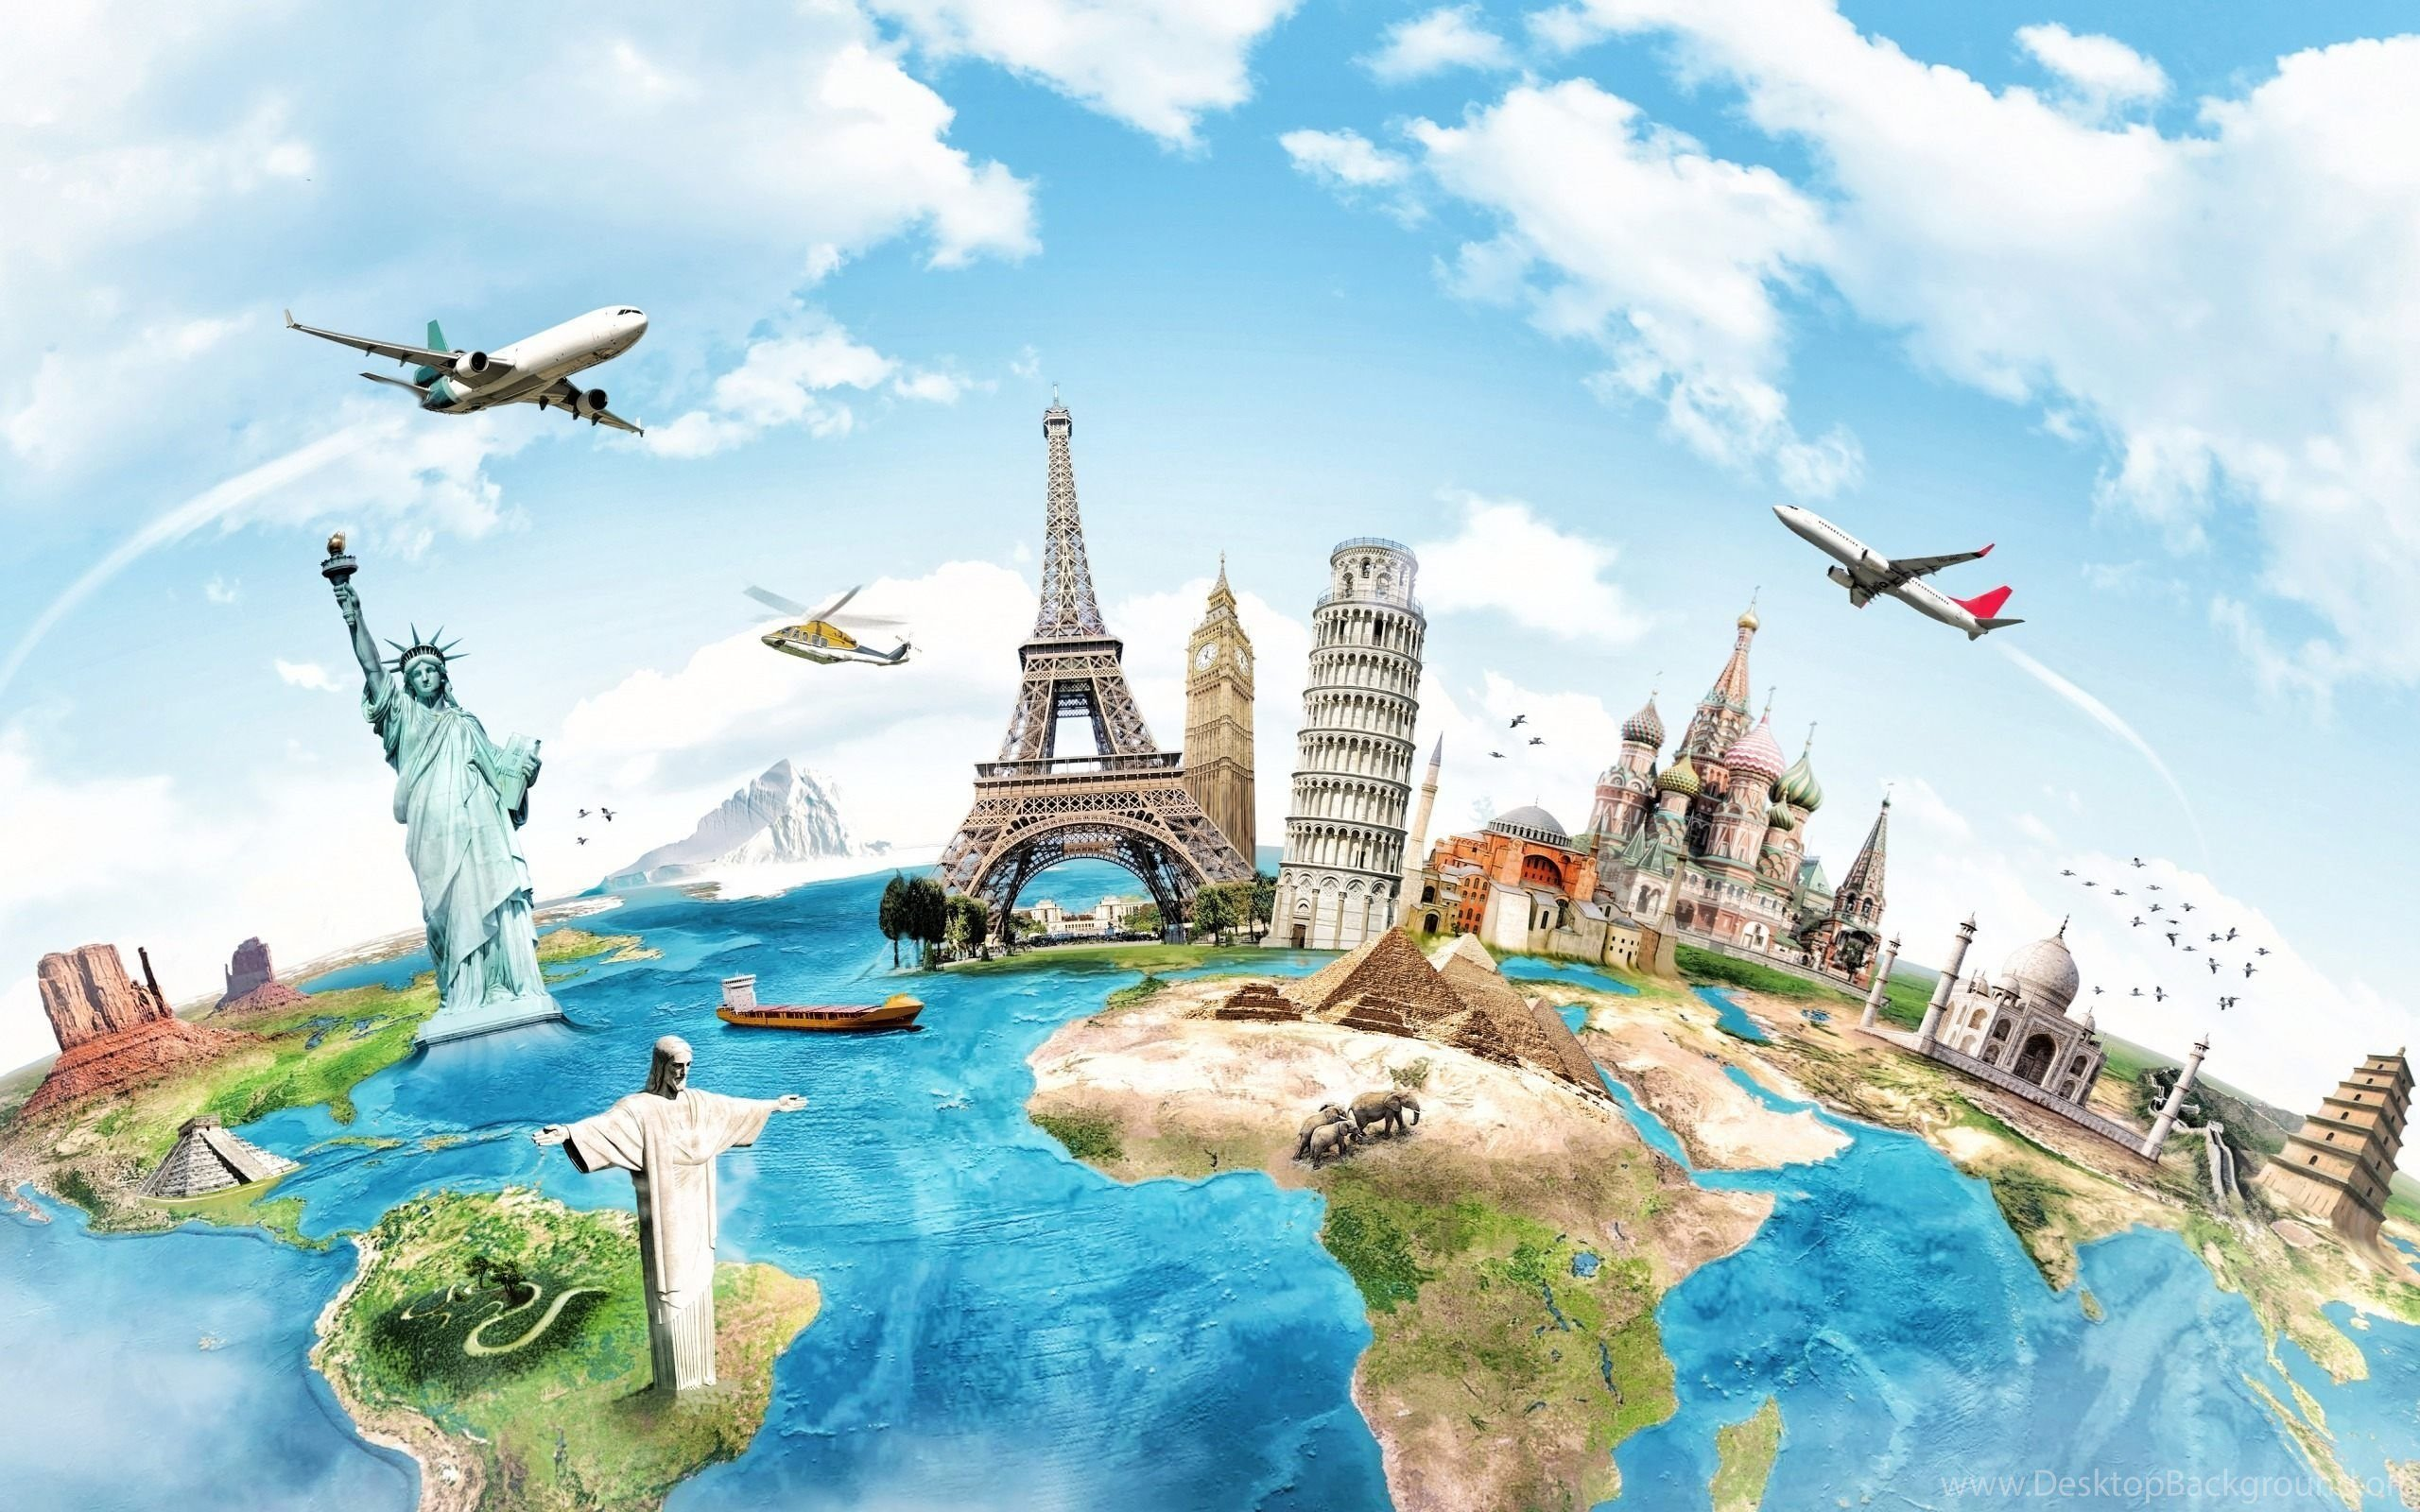

# Overview of Enhanced Tourist Dataset Preparation

The tourism industry plays a vital role in the global economy, and effectively analyzing tourist data can yield significant insights for various stakeholders. This notebook outlines a structured approach to enhancing a tourist dataset by introducing new columns and encoding existing ones, thereby improving its usability for subsequent analyses.

## Objectives

- **Understand the Dataset**: Conduct a thorough examination of the dataset's structure, variables, and basic statistics to establish a foundational understanding.
- **Data Cleaning**: Identify and rectify any missing or erroneous data to maintain dataset integrity, including visualizing null data to understand patterns of missingness.
- **Adding New Columns**: Introduce new columns such as **Continent**, **FA Encoded**, **Continent Count**, and **Encoded Best Time to Visit** to enrich the dataset.
- **Label Encoding**: Apply label encoding to categorical variables to facilitate numerical analysis and improve model compatibility.
- **Custom Encoding**: Develop custom encoding strategies for specific variables that may require unique treatment based on domain knowledge or data characteristics.
- **Rearranging Data**: Optimize the dataset's layout by rearranging columns for better logical flow and usability in analysis.
- **Descriptive Statistics**: Calculate and visualize summary statistics to provide insights into the data's central tendencies and dispersion.

## Methodology

1. **Data Loading**: Import the dataset into a pandas DataFrame for analysis.
2. **Data Cleaning**: Address missing values, outliers, and inconsistencies to ensure data quality.
3. **Adding New Columns**: Incorporate additional columns that offer deeper insights into tourist behaviors and preferences.
4. **Label Encoding and Custom Encoding**: Implement encoding techniques to convert categorical variables into numerical formats suitable for analysis.
5. **Rearranging Data**: Adjust the layout of the dataset for improved clarity and usability.
6. **Descriptive Statistics**: Employ statistical techniques to summarize the data and highlight key trends.

## Key Findings

- The enhanced dataset now includes new columns such as **Continent**, **FA Encoded**, **Continent Count**, and **Encoded Best Time to Visit**, which facilitate more nuanced analyses.
- A clearer understanding of the dataset's structure and variables has been achieved, enabling more effective data utilization.
- Key trends and patterns have been identified, providing valuable insights into tourist behaviors and preferences.

## Conclusion

The preparation of the enhanced tourist dataset establishes a robust foundation for further analysis. By adding new columns and encoding existing ones, the dataset's usability has significantly improved, revealing critical insights that can inform decision-making among stakeholders in the tourism industry. This structured enhancement will support informed strategies aimed at fostering growth within this dynamic sector.

Incorporating advanced techniques such as big data analytics can further enhance tourism management practices, allowing organizations to analyze visitor behaviors in real-time and tailor experiences accordingly. As the industry continues to evolve, leveraging these enhancements will be essential for adapting to changing traveler demands and preferences.

# Importing Necessary Libraries

In [ ]:
# Intermediate Friendly Exploratory Data Analysis on Unique Tourist Destinations Data. We will first install unavailable Module pycountry_convert and import other necessary Libraries/Packages/Modules.
!pip install pycountry_convert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
import pycountry_convert as pc
warnings.filterwarnings("ignore")

# Unique Tourist Destinations Data

In [ ]:
# Getting some intel!!!
df = pd.read_csv("/kaggle/input/tourismdata-csv/TourismData.csv")
df.tail(10)

# Descriptive Analytics of **This Data**

In [ ]:
# Knowing about it using various methods.
print(df.info(),"\n\n")
df.describe(include="all")

# Visualizing Null Data

In [ ]:
# It seems, This data is already handled properly against Null values. 
df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.xlabel("Axis=0 Null Data")
plt.ylabel("Axis=1 Null Data")
plt.title("Heatmap of Null Data")
plt.show()

# Standardizing Our Data

In [ ]:
# Print below confirms our assumption, this data is handled well indeed. I rechecked it because in diagramatic format sometimes the null rows are too less to be seen. Duplicates should also be removed to promote Standardization.
print(df.isnull().sum())
#df = df.dropna() no need
df = df.drop_duplicates()

In [ ]:
# As our data has mostly string values, we should standardize our String Values.
for i in df:
  df[i] = df[i].str.strip().str.lower()
df.tail()

# Adding Some Numerical Data Columns

In [ ]:
# Our Numerical Data Columns are Country_Count and Serial Number, atlast we have checked if both columns are serving their purpose or not.
counter = {}
df["Country_Count"] = 0
for i in range(len(df)):
  if df["Country"][i] not in counter:
    counter[df["Country"][i]] = 1
  else:
    counter[df["Country"][i]] += 1
  df["Country_Count"][i] = counter[df["Country"][i]]
df["Serial Number"] = range(1, len(df)+1)
df.drop("Destination", axis=1, inplace=True)
df.head(40)

# Rearranging and Encoding DataFrame

In [ ]:
# Rearranging Our New Columns and Printing tourists from countries with most Count.
col = df.columns.tolist()
col = col[-1:] + col[:-1]
col = col[:2] + [col[-1]] + col[2:-1]
df = df[col]
df.sort_values(by="Country_Count", ascending=False).head(15)

In [ ]:
# Using LabelEncoder which is one of the simplest encoding techniques is used here to Encode the Famous Attraction here.
le = LabelEncoder()
df['FA Encoded'] = le.fit_transform(df['Famous Attraction'])
col = df.columns.tolist()
col = col[:4] + [col[-1]] + col[4:-1]
df = df[col]
print(f'Total Number of Unique Famous Attractions are {len(df["Famous Attraction"].unique())} and Max Entry of FA Encoded is {max(df["FA Encoded"])} which shows that our Label Encoding is successful without any clashes and note: FA Encoded is 0 Based.\n')
df.tail(15)

In [ ]:
# Encoding the Best Time to Visit Column. Here, for example in 1.1 the 1 represents Pattern Number and .1 represents Repetition Number. Pattern Number 1 starts from January and each repetition is of 3 months width, Pattern Number 2 starts from december and each repetition is of 3 months width as well, Pattern Number 3 from november and each repetition is of 4 months width and at last there is Pattern Number 4 which has only 1 repetition which is of width of 12 months so starting month doesn't matter in this case.
for i in df["Best Time to Visit"]:
  if i == "january to march":
    df["Best Time to Visit"].replace(i, 1.1, inplace=True)
  elif i == "april to june":
    df["Best Time to Visit"].replace(i, 1.2, inplace=True)
  elif i == "july to september":
    df["Best Time to Visit"].replace(i, 1.3, inplace=True)
  elif i == "october to december":
    df["Best Time to Visit"].replace(i, 1.4, inplace=True)
  elif i == "december to february":
    df["Best Time to Visit"].replace(i, 2.1, inplace=True)
  elif i == "march to may":
    df["Best Time to Visit"].replace(i, 2.2, inplace=True)
  elif i == "june to august":
    df["Best Time to Visit"].replace(i, 2.3, inplace=True)
  elif i == "september to november":
    df["Best Time to Visit"].replace(i, 2.4, inplace=True)
  elif i == "november to february":
    df["Best Time to Visit"].replace(i, 3.1, inplace=True)
  elif i == "march to june":
    df["Best Time to Visit"].replace(i, 3.2, inplace=True)
  elif i == "july to october":
    df["Best Time to Visit"].replace(i, 3.3, inplace=True)
  elif i == "year-round":
    df["Best Time to Visit"].replace(i, 4.1, inplace=True)
df.head(20)


# Continent Column and Finalization

In [ ]:
# Now we will create a "Continent" Column to make our data better for that we titlized "Country" Column as well. kf is made to check if there are any countries for which the output is unknown.
df["Country"] = df["Country"].str.title()
def countries_adjuster(country_name):
    if country_name == "Usa":
        country_name = "United States of America"
    elif country_name == "Uk":
        country_name = "United Kingdom"
    elif country_name == "Uae":
        country_name = "United Arab Emirates"
    elif "And The" in country_name:
        country_name = country_name.replace("And The", "and the") 
    elif "Of" in country_name:
        country_name = country_name.replace("Of","of")
    elif "And" in country_name:
        country_name = country_name.replace("And","and")
    return country_name
def get_continent(country_name):
    try:
      country_alpha2 = pc.country_name_to_country_alpha2(country_name)
      continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
      continent_name = pc.convert_continent_code_to_continent_name(continent_code)
      return continent_name
    except:
      return "Unknown"
df["Country"] = df["Country"].apply(countries_adjuster)
df["Continent"] = df["Country"].apply(get_continent)
kf = df[df["Continent"] == "Unknown"]
kf.head(20)

In [ ]:
# Last final check after all Tweaks and Changes made to our Dataframe "df".
col = df.columns.tolist()
col = [col[0]] + [col[-1]] + col[1:-1]
df = df[col]
df.head(20)

> # Now, Let us conclude our Notebook, Thank You! 